In [9]:
from __future__ import print_function
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.metrics import classification_report
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, svm, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
#from utils import report, run_tasks, makedirs
from scipy.stats import randint as sp_randint
from time import time
import warnings
warnings.filterwarnings("ignore")

In [10]:
def myCurve(x):
    """ function to approximate by polynomial interpolation"""
    return np.abs(x) + x * np.sin(x)

Use the following template to overlay linear, quadaratic, and cubic fits ontop of ground truth data. Ground truth points are navy circles, groud truth solid line is light green linear, quadratic, cubic line colors are red, cyan, blue You might find the scikit learn api documentation helpful:

make_pipeline()   https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

fit() and predict() https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [16]:
def task1():
  # generate training set
    x_train = np.linspace(-4, 10, 50) #50 points from -4 to 10
    y_train = myCurve(x_train)

    # generate test points  
    x_test = np.linspace(-3.3, 9.8, 50) #50 points from -3.3 to 9.8

    # create matrix versions of these arrays
    X_train = x_train[:, np.newaxis]
    X_test = x_test[:, np.newaxis]

    #plot ground truth
    colors = ['red', 'cyan', 'blue']
    lw = 2
    f1, a1 = plt.subplots()
    f2, a2 = plt.subplots()
    a1.plot(x_test, myCurve(x_test), color='lightgreen', linewidth=lw,
         label="ground truth")
    a1.scatter(x_train, y_train, color='navy', s=30, marker='o', label="training points")
    f1.show()
    model = make_pipeline(PolynomialFeatures(degree=1), Ridge())
    model.fit(X_train, y_train)
    history = model.predict(X_test)
    history = np.array(history)
    history2 = np.square(history)
    history3 = np.power(history, 3)
    a2.plot(history, label='Linear Results')
    a2.plot(history2, label='Quadratic Results')
    a2.plot(history3,label='Cubic Results')
    a2.legend()
    f2.show()

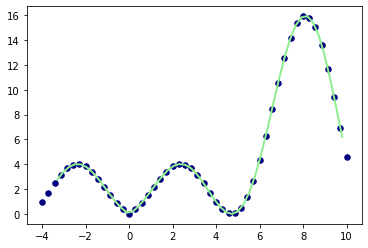

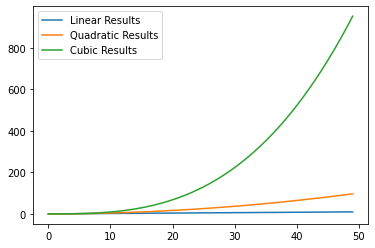

In [17]:
task1()

Use the following template to create a 3x2 subplot. The plots, from first to last are:

input dataset;
KNN K=3;   
linearSVM C=1;   
RBF SVM C=0.025 gamma=0.1;  
Random Forest max_depth=5;   
Neural network , 2 hidden layers each with 20 neurons, regularization L2 penalty=1

You'll find the following APIs helpful in creating the classifiers:
    
KNeighborsClassifier(): https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

SVC(): https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

RandomForestClassifier(): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    
MLPClassifier(): https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [36]:
def task2():
  names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Random Forest", "NNet"]
  classifiers = [KNeighborsClassifier(n_neighbors=3), SVC(kernel='linear'), SVC(kernel='rbf'), RandomForestClassifier(max_depth=5), MLPClassifier(hidden_layer_sizes=(20,20), alpha=1)]
  X, y = make_moons(noise=0.3, random_state=0)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

  h = .02  # step size in the mesh
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

  i = 1
  plt.figure(1)
  ax = plt.subplot((len(names)+1)/2,(len(names)+1)/((len(names)+1)/2),i) #3x2 subplot, start on 1st. Could also use ax = plt.subplot(311)

  # just plot the dataset first
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax.set_title("Input data")
  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
  # and testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  i += 1

  # iterate over classifiers
  for name, classifier in zip(names, classifiers):
    ax = plt.subplot((len(names)+1)/2,(len(names)+1)/((len(names)+1)/2),i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    score = classifier.score(X_test, y_test)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(classifier, "decision_function"):
      Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
      Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

      # Plot also the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
      # and testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6)

      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
    
      ax.set_title(name)
      ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
      i += 1

    plt.tight_layout()

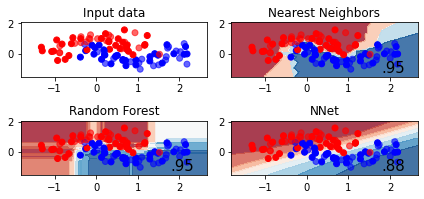

In [37]:
task2()

Use the following template to implement GridSearchCV. For example, you can specify:

tuned_parameters = [{'kernel': ['linear'], 'C': [0.1, 1, 10]}, {'kernel': ['rbf'], 'C': [0.1, 1, 10]}]

to explore SVM with linear and rbf kernels, evaluating the parameter C over a range of values.

In [41]:
def task3():

    # Loading the Digits dataset
    digits = datasets.load_digits()

    # To apply an classifier on this data, we need to flatten the image, to
    # turn the data in a (samples, feature) matrix:
    n_samples = len(digits.images)
    X = digits.images.reshape((n_samples, -1))
    y = digits.target

    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    tuned_parameters = [{'kernel':['linear'], 'C':[0.1, 1, 10]}, {'kernel':['rbf'], 'C':[0.1, 1, 10], 'gamma': [0.001, 0.0001]}]
    score = 'accuracy' 
    print("# Tuning hyper-parameters for %s" % score)

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                    scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("All scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
  
    print("Detailed classification report:")
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_true, y_pred))
    cm = metrics.confusion_matrix(y_true, y_pred)
    print("Accuracy of best model = %d%% \n" % (100*cm.diagonal().sum()/cm.sum()))



In [42]:
task3()

# Tuning hyper-parameters for accuracy
Best parameters set found on development set:
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
All scores on development set:
0.972 (+/-0.012) for {'C': 0.1, 'kernel': 'linear'}
0.972 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.972 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.943 (+/-0.028) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.676 (+/-0.035) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.986 (+/-0.021) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.958 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.021) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.029) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
    

Use the following template to contrast RandomizedSearchCV vs. GridSearchCV. 

Example of RandomizedSearchCV from http://scikit-learn.org/stable/auto_examplesmodel_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py

A computation budget is set via n_iter. For each hyperparameter, either a distribution over possible values or a list of discrete choices (which will be sampled uniformly) can be specified:

{'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),'kernel': ['rbf'], 'class_weight':['balanced', None]}

In [49]:
!pip install utils

In [55]:
!pip install report

In [64]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [65]:
from sklearn.datasets import load_digits
def task4():
  digits = load_digits()
  X, y = digits.data, digits.target

  # build a classifier
  clf = RandomForestClassifier(n_estimators=20)

  # specify parameters and distributions to sample from
  param_dist = {"max_depth": [3, None],
                "max_features": sp_randint(1, 11),
                "min_samples_split": sp_randint(2, 11),
                "min_samples_leaf": sp_randint(1, 11),
                "bootstrap": [True, False],
                "criterion": ["gini", "entropy"]}
  # run randomized search
  n_iter_search = 30
  random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
  start = time()
  random_search.fit(X, y)
  print("RandomizedSearchCV took %.2f seconds for %d candidates"
        " parameter settings." % ((time() - start), n_iter_search))
  report(random_search.cv_results_)

  # Now compare above to GridSearchCV
  # report top three models and time
  # use below param_grid:
  param_grid = {"max_depth": [3, None],
                "max_features": [1, 11],
                "min_samples_split": [2, 11],
                "min_samples_leaf": [1, 11],
                "bootstrap": [True, False],
                "criterion": ["gini", "entropy"]}

  grid_search = GridSearchCV(clf, param_grid=param_grid)
  start = time()
  grid_search.fit(X, y)
  print("GridSearchCV took %.2f seconds for %d candidates"
        " parameter settings." % ((time() - start), n_iter_search))
  report(grid_search.cv_results_)

In [66]:
task4()

RandomizedSearchCV took 8.54 seconds for 30 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.924 (std: 0.018)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 9}

Model with rank: 2
Mean validation score: 0.923 (std: 0.024)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 9}

Model with rank: 3
Mean validation score: 0.922 (std: 0.033)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 8}

GridSearchCV took 16.48 seconds for 30 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.936 (std: 0.022)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.